# Importing Libraries

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_excel("Salary Data for Multiple Linear Regression.xlsx")

In [3]:
df.head()

,Position,Type,Location,Interview,Experience,Salary
0,DA,WFH,Remote,10,1.2,39344
1,DA,WFH,Remote,5,1.4,46206
2,DA,WFH,Remote,7,1.6,37732
3,DA,WFH,Remote,8,2.1,43526
4,DA,WFH,Remote,6,2.3,39892


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Position    30 non-null     object 
 1   Type        30 non-null     object 
 2   Location    30 non-null     object 
 3   Interview   30 non-null     int64  
 4   Experience  30 non-null     float64
 5   Salary      30 non-null     int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 1.5+ KB


# Exploratory Data Analysis

In [5]:
df["Position"].value_counts()

Position
DA    15
DS    15
Name: count, dtype: int64

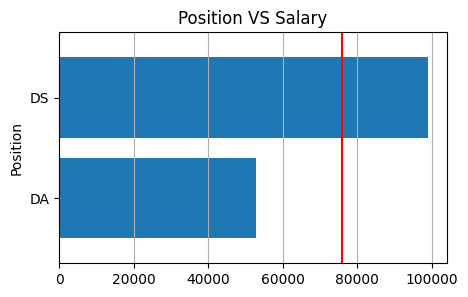

In [6]:
df.groupby("Position")["Salary"].mean().plot(kind="barh", figsize=(5,3), width=0.8, 
                                             title="Position VS Salary")
plt.grid(axis="x")
plt.axvline(df["Salary"].mean(), color="red")
plt.show()

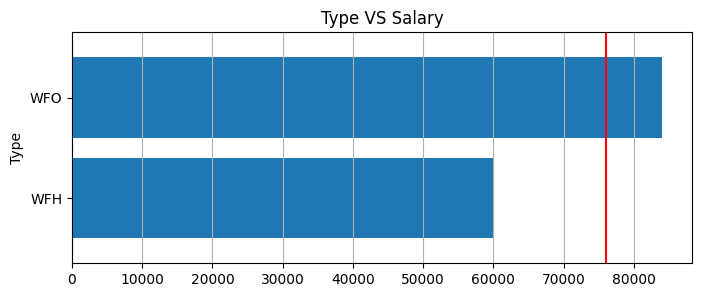

In [7]:
df.groupby("Type")["Salary"].mean().plot(kind="barh", figsize=(8,3), width=0.8, 
                                             title="Type VS Salary")
plt.grid(axis="x")
plt.axvline(df["Salary"].mean(), color="red")
plt.show()

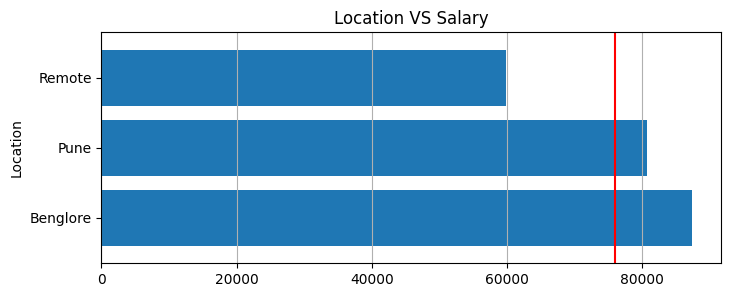

In [8]:
df.groupby("Location")["Salary"].mean().plot(kind="barh", figsize=(8,3), width=0.8, 
                                             title="Location VS Salary")
plt.grid(axis="x")
plt.axvline(df["Salary"].mean(), color="red")
plt.show()

In [9]:
pd.crosstab(df["Position"], df["Type"])

Type,WFH,WFO
Position,,
DA,5,10
DS,5,10


In [10]:
pd.pivot_table(df, index="Location", columns="Position", values="Salary", aggfunc="mean")

Position,DA,DS
Location,,
Benglore,58833.2,115890.8
Pune,58575.2,102912.2
Remote,41340.0,78472.6


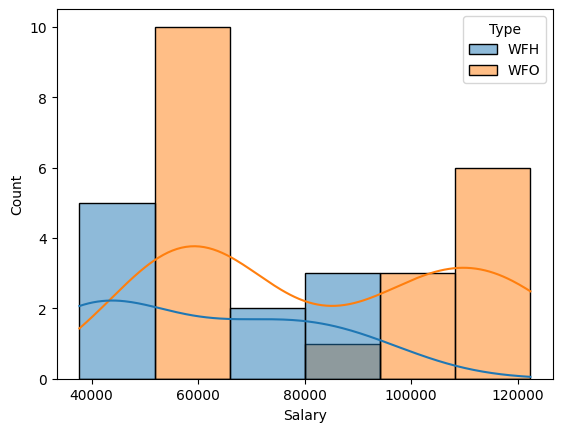

In [11]:
sns.histplot(df, x="Salary", kde=True, hue="Type")
plt.show()

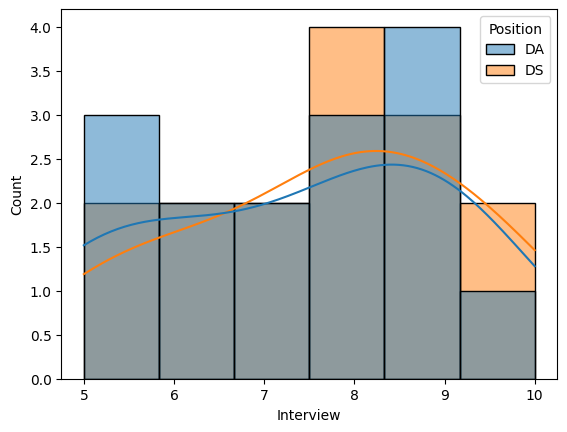

In [12]:
sns.histplot(df, x="Interview", kde=True, hue="Position")
plt.show()

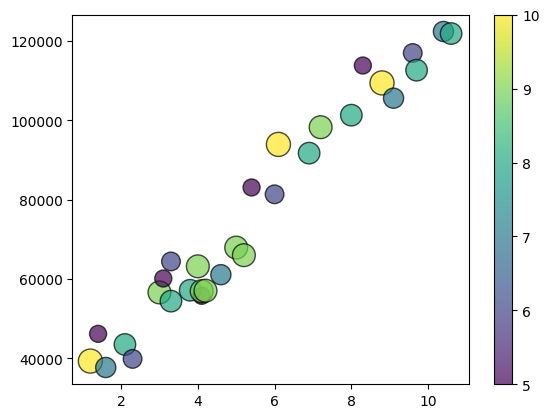

In [13]:
plt.scatter(df["Experience"],df["Salary"], s=df["Interview"]*30, c=df["Interview"], alpha=0.7, edgecolors="black")
plt.colorbar()
plt.show()

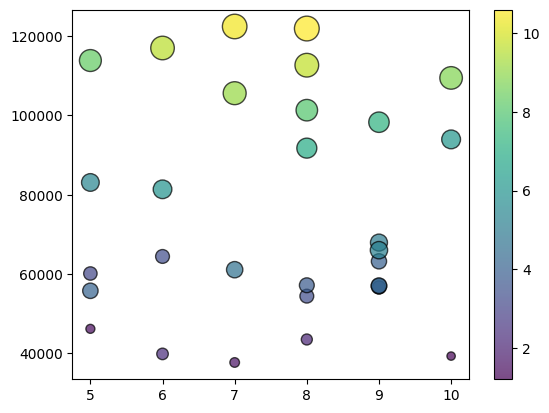

In [14]:
plt.scatter(df["Interview"],df["Salary"], s=df["Experience"]*30, c=df["Experience"], alpha=0.7, edgecolors="black")
plt.colorbar()
plt.show()

In [15]:
df[["Experience", "Interview", "Salary"]].corr()

,Experience,Interview,Salary
Experience,1.000000,0.042277,0.978242
Interview,0.042277,1.000000,0.004856
Salary,0.978242,0.004856,1.000000


In [16]:
df.head()

,Position,Type,Location,Interview,Experience,Salary
0,DA,WFH,Remote,10,1.2,39344
1,DA,WFH,Remote,5,1.4,46206
2,DA,WFH,Remote,7,1.6,37732
3,DA,WFH,Remote,8,2.1,43526
4,DA,WFH,Remote,6,2.3,39892


In [17]:
for i in ["Position", "Type", "Location"]:
    print(f"column {i} and values in col {df[i].unique()}")

column Position and values in col ['DA' 'DS']
column Type and values in col ['WFH' 'WFO']
column Location and values in col ['Remote' 'Pune' 'Benglore']


# Cpverting data in standard form
# converting all catergorical col into numerical col
# scaler transformation of all numeric col

In [18]:
df.sample(5)

,Position,Type,Location,Interview,Experience,Salary
29,DS,WFO,Benglore,8,10.6,121873
1,DA,WFH,Remote,5,1.4,46206
7,DA,WFO,Pune,8,3.3,54446
25,DS,WFO,Benglore,7,9.1,105583
9,DA,WFO,Pune,8,3.8,57190


In [19]:
ohe= OneHotEncoder(drop="first")

In [23]:
encoded= ohe.fit_transform(df[["Position", "Type", "Location"]])

In [24]:
encoded.toarray()

array([[0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 1., 1., 0.],
       [0., 1., 1., 0.],
       [0., 1., 1., 0.],
       [0., 1., 1., 0.],
       [0., 1., 1., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 1.],
       [1., 0., 0., 1.],
       [1., 0., 0., 1.],
       [1., 0., 0., 1.],
       [1., 0., 0., 1.],
       [1., 1., 1., 0.],
       [1., 1., 1., 0.],
       [1., 1., 1., 0.],
       [1., 1., 1., 0.],
       [1., 1., 1., 0.],
       [1., 1., 0., 0.],
       [1., 1., 0., 0.],
       [1., 1., 0., 0.],
       [1., 1., 0., 0.],
       [1., 1., 0., 0.]])

In [25]:
ohe.get_feature_names_out()

array(['Position_DS', 'Type_WFO', 'Location_Pune', 'Location_Remote'],
      dtype=object)

In [26]:
df[ohe.get_feature_names_out()]= encoded.toarray()

In [27]:
df.head()

,Position,Type,Location,Interview,Experience,Salary,Position_DS,Type_WFO,Location_Pune,Location_Remote
0,DA,WFH,Remote,10,1.2,39344,0.0,0.0,0.0,1.0
1,DA,WFH,Remote,5,1.4,46206,0.0,0.0,0.0,1.0
2,DA,WFH,Remote,7,1.6,37732,0.0,0.0,0.0,1.0
3,DA,WFH,Remote,8,2.1,43526,0.0,0.0,0.0,1.0
4,DA,WFH,Remote,6,2.3,39892,0.0,0.0,0.0,1.0


In [28]:
df.drop(["Position", "Type", "Location"], axis=1, inplace=True)

In [30]:
df.sample(5)

,Interview,Experience,Salary,Position_DS,Type_WFO,Location_Pune,Location_Remote
17,5,5.4,83089,1.0,0.0,0.0,1.0
24,10,8.8,109432,1.0,1.0,1.0,0.0
25,7,9.1,105583,1.0,1.0,0.0,0.0
26,6,9.6,116970,1.0,1.0,0.0,0.0
27,8,9.7,112636,1.0,1.0,0.0,0.0


In [31]:
std_scaler= StandardScaler()

In [34]:
df[["Interview","Experience"]]=std_scaler.fit_transform(df[["Interview","Experience"]])

In [35]:
df.sample(5)

,Interview,Experience,Salary,Position_DS,Type_WFO,Location_Pune,Location_Remote
27,0.290409,1.536336,112636,1.0,1.0,0.0,0.0
7,0.290409,-0.757416,54446,0.0,1.0,1.0,0.0
3,0.290409,-1.187494,43526,0.0,0.0,0.0,1.0
20,0.290409,0.532819,91739,1.0,1.0,1.0,0.0
10,0.912714,-0.506537,63219,0.0,1.0,0.0,0.0


In [36]:
minmax_scaler=MinMaxScaler()

In [37]:
df["Salary"]= minmax_scaler.fit_transform(df[["Salary"]])

In [38]:
df.sample(5)

,Interview,Experience,Salary,Position_DS,Type_WFO,Location_Pune,Location_Remote
14,-0.331896,-0.291498,0.276163,0.0,1.0,0.0,0.0
28,-0.331896,1.787215,1.000000,1.0,1.0,0.0,0.0
13,0.912714,-0.434857,0.228561,0.0,1.0,0.0,0.0
7,0.290409,-0.757416,0.197425,0.0,1.0,1.0,0.0
1,-1.576506,-1.438373,0.100094,0.0,0.0,0.0,1.0


In [40]:
df.columns

Index(['Interview', 'Experience', 'Salary', 'Position_DS', 'Type_WFO',
       'Location_Pune', 'Location_Remote'],
      dtype='object')

In [41]:
df= df[['Interview', 'Experience', 'Position_DS', 'Type_WFO',
       'Location_Pune', 'Location_Remote','Salary',]]

In [42]:
df.head()

,Interview,Experience,Position_DS,Type_WFO,Location_Pune,Location_Remote,Salary
0,1.535019,-1.510053,0.0,0.0,0.0,1.0,0.019041
1,-1.576506,-1.438373,0.0,0.0,0.0,1.0,0.100094
2,-0.331896,-1.366693,0.0,0.0,0.0,1.0,0.000000
3,0.290409,-1.187494,0.0,0.0,0.0,1.0,0.068438
4,-0.954201,-1.115814,0.0,0.0,0.0,1.0,0.025514


In [43]:
df.corr()

,Interview,Experience,Position_DS,Type_WFO,Location_Pune,Location_Remote,Salary
Interview,1.000000,0.042277,8.297398e-02,1.466787e-02,2.933573e-02,-1.466787e-02,0.004856
Experience,0.042277,1.000000,8.386528e-01,4.519432e-01,3.970342e-02,-4.519432e-01,0.978242
Position_DS,0.082974,0.838653,1.000000e+00,-1.530840e-16,-7.457939e-17,8.242985e-17,0.856577
Type_WFO,0.014668,0.451943,-1.530840e-16,1.000000e+00,5.000000e-01,-1.000000e+00,0.422310
Location_Pune,0.029336,0.039703,-7.457939e-17,5.000000e-01,1.000000e+00,-5.000000e-01,0.124342
Location_Remote,-0.014668,-0.451943,8.242985e-17,-1.000000e+00,-5.000000e-01,1.000000e+00,-0.422310
Salary,0.004856,0.978242,8.565766e-01,4.223099e-01,1.243421e-01,-4.223099e-01,1.000000


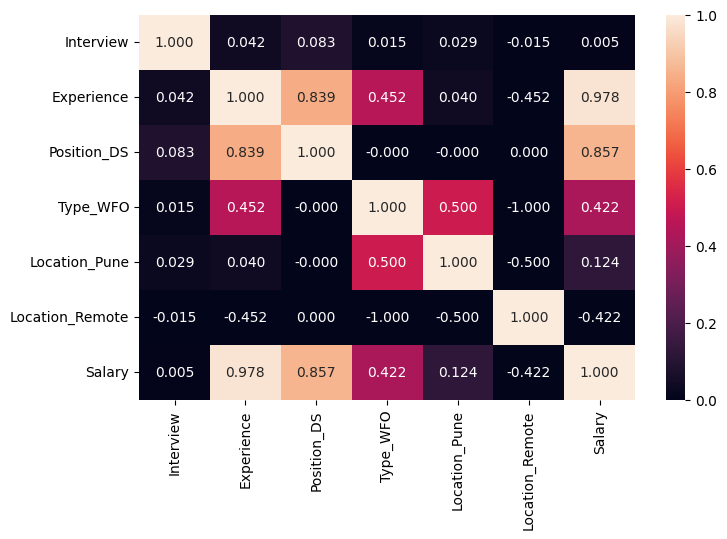

In [45]:
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(), annot=True, fmt=".3f", vmax=1, vmin=0)
plt.show()